In [98]:
import pandas as  pd
from collections import Counter
import matplotlib.pyplot as plt
from collections import Counter

# Level 1

# Task 1: Top Cuisines

# Determine the top three most common cuisines in the dataset

In [99]:
df=pd.read_csv("Dataset .csv") 
df.head()   

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [100]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [101]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [102]:
cuisine_col = "Cuisines"

In [103]:
df = df.dropna(subset=[cuisine_col])

In [104]:
all_cuisines = df[cuisine_col].str.split(',').explode().str.strip()
cuisine_counts = Counter(all_cuisines)

In [105]:
top_3 = cuisine_counts.most_common(3)
top_3

[('North Indian', 3960), ('Chinese', 2735), ('Fast Food', 1986)]

# Calculate the percentage of restaurants that serve each of the top cuisines.

In [106]:
total_restaurants = len(df)
print("There are Total",total_restaurants,"Restaurants")

There are Total 9542 Restaurants


In [107]:
# Print results with percentages
print("Top 3 Cuisines and their percentage of restaurants:")
for cuisine, count in top_3:
    percentage = (count / total_restaurants) * 100
    print(f"{cuisine}: {count} restaurants ({percentage:.2f}%)")

Top 3 Cuisines and their percentage of restaurants:
North Indian: 3960 restaurants (41.50%)
Chinese: 2735 restaurants (28.66%)
Fast Food: 1986 restaurants (20.81%)


# Task 2: City Analysis

# Identify the city with the highest number of restaurants in the dataset.

In [108]:
city_counts = df['City'].value_counts()
city_counts

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
             ... 
Inverloch       1
Mohali          1
Panchkula       1
Bandung         1
Randburg        1
Name: count, Length: 140, dtype: int64

In [109]:
top_city = city_counts.idxmax()
top_city


'New Delhi'

In [110]:
top_city_count = city_counts.max()
top_city_count

np.int64(5473)

In [111]:
print(f"City with the most restaurants: {top_city} ({top_city_count} restaurants)")

City with the most restaurants: New Delhi (5473 restaurants)


In [112]:
df = df.dropna(subset=['Aggregate rating'])
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# Calculate the average rating for restaurants in each city.

In [113]:
# Group by city and calculate average rating
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
avg_rating_by_city

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 140, dtype: float64

# Determine the city with the highest average rating.

In [114]:
top_rated_city = avg_rating_by_city.idxmax()
top_avg_rating = avg_rating_by_city.max()

In [115]:
print("\nAverage Rating by City:")
print(avg_rating_by_city)


Average Rating by City:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 140, dtype: float64


In [116]:
print(f"\nCity with highest average rating: {top_rated_city} ({top_avg_rating:.2f})")


City with highest average rating: Inner City (4.90)


# Task 3: Price Range Distribution

# Calculate the percentage of restaurants in each price range category.

In [117]:
price_column = "Price range"

In [118]:
df = df.dropna(subset=[price_column])


In [119]:
# Count each price range
price_counts = df[price_column].value_counts().sort_index()

In [120]:
# Calculate percentages
price_percentages = (price_counts / len(df)) * 100

In [121]:
# Display percentage for each category
print("Percentage of restaurants in each price range:")
for pr, pct in price_percentages.items():
    print(f"Price Range {pr}: {pct:.2f}%")


Percentage of restaurants in each price range:
Price Range 1: 46.51%
Price Range 2: 32.62%
Price Range 3: 14.72%
Price Range 4: 6.14%


# Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

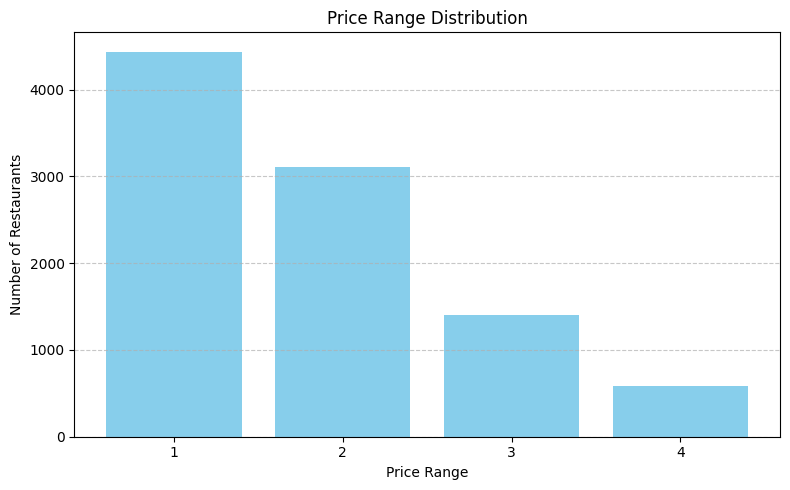

In [122]:
# Plotting
plt.figure(figsize=(8, 5))
plt.bar(price_counts.index.astype(str), price_counts.values, color='skyblue')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Task 4: Online Delivery

# Determine the percentage of restaurants that offer online delivery.

In [123]:
online_delivery_col = "Has Online delivery"     
rating_col = "Aggregate rating"     

In [124]:
df_clean = df.dropna(subset=[online_delivery_col, rating_col])

In [125]:
delivery_counts = df_clean[online_delivery_col].value_counts()

In [126]:
# If values are "Yes"/"No", normalize with string keys
if delivery_counts.index.dtype == object:
    yes_count = delivery_counts.get("Yes", 0)
    total = delivery_counts.sum()
else:
    # For numeric 1/0
    yes_count = delivery_counts.get(1, 0)
    total = delivery_counts.sum()

In [127]:
online_delivery_percentage = (yes_count / total) * 100
print(f"Percentage of restaurants offering online delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering online delivery: 25.69%


# Compare the average ratings of restaurants with and without online delivery.

In [128]:
avg_ratings = df_clean.groupby(online_delivery_col)[rating_col].mean()


In [129]:
print("\nAverage Ratings:")
for delivery_status, rating in avg_ratings.items():
    print(f"{delivery_status}: {rating:.2f}")



Average Ratings:
No: 2.46
Yes: 3.25
